In [91]:
import numpy as np
import pandas as pd
import seaborn as sns

import spacy
from tqdm import tqdm


# Imports cleaned tweets data

In [92]:
df_tickers_dow = pd.read_csv("data/tickers_dow.csv")
df_tickers_sp_100 = pd.read_csv("data/tickers_sp_100.csv")

df_tickers = pd.concat([df_tickers_dow, df_tickers_sp_100])

id2ticker = dict(zip(df_tickers.user_id, df_tickers.ticker))

In [93]:
df_tweets = pd.read_csv('data/tweets_dow.csv', parse_dates=['created_at'], dtype={'id':'Int64', 'text':'string', 'author_id':'Int64'})

df_tweets.rename(columns={'created_at':'time'}, inplace=True)
df_tweets['ticker'] = df_tweets['author_id'].map(id2ticker)
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186204 entries, 0 to 186203
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype              
---  ------     --------------   -----              
 0   id         186204 non-null  Int64              
 1   author_id  186204 non-null  Int64              
 2   text       186204 non-null  string             
 3   time       186204 non-null  datetime64[ns, UTC]
 4   ticker     186204 non-null  object             
dtypes: Int64(2), datetime64[ns, UTC](1), object(1), string(1)
memory usage: 7.5+ MB


In [94]:
df_tweets.head()

,id,author_id,text,time,ticker
0,1530202298017890306,21021891,"We're excited to announce we have sanctioned the Ballymore project in the deepwater U.S. Gulf of Mexico. This low-cost tieback project is expected to add up to 75,000 barrels per day of oil production to help meet US demand.",2022-05-27 15:00:32+00:00,CVX
1,1530201208312438790,21021891,"Chevron's US Permian Basin operation sites are approximately two-thirds less carbon-intensive than the global average. As part of a larger effort to help offset rising energy demands and lower carbon emissions, we are increasing production in the Permian Basin by over 15%.",2022-05-27 14:56:12+00:00,CVX
2,1529833838020644864,21021891,"We have identified nearly 100 GHG abatement projects to reduce the carbon intensity of our operations, and expect them to deliver approximately 4 million tonnes of emissions reductions per year when completed. Read on in our Corporate Sustainability Report.",2022-05-26 14:36:24+00:00,CVX
3,1529537844171227136,21021891,We’ve identified nearly 100 GHG-abatement projects that are expected to deliver approximately 4M tonnes of emissions reductions per year. Learn more in our Corporate Sustainability Report: https://t.co/dLmfU8ibNC https://t.co/9QzRij2PuP,2022-05-25 19:00:14+00:00,CVX
4,1527752758337540096,21021891,RT @ftlive: Decarbonising an industry in recovery: Mark Nelson tells us what he sees on the horizon for sustainable aviation fuel. Mark wil…,2022-05-20 20:46:56+00:00,CVX


# Classify tweets from trained model

- Add column `pred_score` to `df_tweets`

In [95]:
nlp = spacy.load("./output/model-best")

In [96]:
data = tuple(zip(df_tweets.text.tolist(), df_tweets.index))

In [97]:
pred_score = np.zeros(len(df_tweets))

for doc, i in tqdm(nlp.pipe(data, as_tuples=True), total=len(df_tweets)):
    pred_score[i] = doc.cats['climate_related']

df_tweets['pred_score'] = pred_score

100%|██████████| 186204/186204 [00:32<00:00, 5769.78it/s]


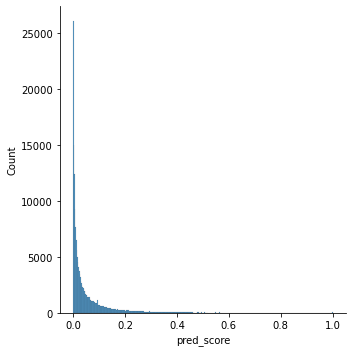

In [98]:
# pred_score pooled from all twitter accounts

sns.displot(df_tweets.pred_score)

In [99]:
# show a snippet of tweets within percentile of pred_score

pd.options.display.max_colwidth = 300

percentile = 0.5

print(len(df_tweets[['pred_score', 'text']][df_tweets.pred_score > percentile]))
df_tweets[['pred_score', 'text']][(df_tweets.pred_score > percentile) & (df_tweets.pred_score < percentile + 0.1)].sample(20).sort_values('pred_score')

3857


,pred_score,text
66031,0.503393,.@IBMCloud moves to unlock billions of dollars in IT value for developers #cloud https://t.co/Jvvg1KPCxv https://t.co/XbRnrAu5Es
7434,0.509188,A #business plan to solve urban fresh #food scarcity. #ImprovingLives @XULA1925 https://t.co/FyqILiZMiW https://t.co/rPjo79lwHB
47892,0.519010,✅ Push rather than lift ✅ Wear layers ✅ Take frequent breaks ✅ Do your best to stay upright https://t.co/gC2VHUtkUP
117340,0.519247,#CleanEnergy success: power and steam generation technology reduce GHG emissions at two of our sites in Brazil. #CWNYC #Dow2025 https://t.co/GJ9jQ18rl0
183651,0.528551,zzzzzz ＜⌒／ヽ-､_＿_ ／＜_/＿＿＿＿／ ∧_∧ ( ･ω･) Forgot to buy milk ＿| ⊃／(＿＿_ ／ └-(＿＿＿_／
185,0.531649,"RT @OGCInews: NEWS: OGCI Climate Investments added @MetronSas, a cleantech company that uses AI technology to increase #energyefficiency, s…"
129615,0.532063,"😯 Here's a stat that will make you say, ""WOW."" (It's part of a new retail report that came in just now.) 📈 550 brand leaders surveyed made it clear, They're hiring 50% more data scientists over the next three years. https://t.co/w4jMcgNl62 #WorldPoetryDay https://t.co/yY5YuhWRjX"
103500,0.536366,Looking for the weekend like: 🐶🦴😜 #FridayFeels #FurryCoworker https://t.co/Symu7H591A
40697,0.537731,"Green power – energy storage – photovoltaics. Cat Microgrid webinar, Oct.11: https://t.co/P92xLqjwJ5 https://t.co/m82QVdqON6"
114332,0.538853,"RT @JimFitterling: Our goal is an environment free of plastic waste, and we’re excited to be working with @MizzouEngineer and @Bill_Buttlar…"


In [100]:
def esg_score(pred_scores, slope = 60, threshold = 0.5):
    '''
    aggragate score by applying sigmoid, then take mean
    input: np.array of pred_score
    output: scaler
    '''
    return np.mean(1 / (1 + np.exp(-slope * (pred_scores - threshold))))

In [101]:
df = df_tweets.pivot(index=['id', 'time'], columns='ticker',values='pred_score')

# after pivot, df contain lots of NaN, which will be excluded after aggregate

df = df.groupby(pd.Grouper(freq='M', level='time')).aggregate(esg_score, threshold = 0.52)


/Users/joe/miniconda3/envs/esg-frontier/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [102]:
df.isnull().sum().sort_values(ascending=False)

ticker
AAPL    8
NKE     6
KO      2
MCD     1
AMGN    0
WBA     0
UNH     0
TRV     0
T       0
PG      0
MSFT    0
MRK     0
MMM     0
MA      0
JPM     0
JNJ     0
INTC    0
IBM     0
HON     0
HD      0
GS      0
DOW     0
DIS     0
CVX     0
CSCO    0
CRM     0
CAT     0
BA      0
AXP     0
WMT     0
dtype: int64

In [103]:
df.mean().sort_values()

ticker
AAPL    0.000152
KO      0.005312
NKE     0.006384
DIS     0.007044
AXP     0.007973
MA      0.008620
INTC    0.008909
T       0.009330
UNH     0.010068
WBA     0.012610
MCD     0.012806
JNJ     0.013636
AMGN    0.013819
JPM     0.015249
MRK     0.016274
IBM     0.016503
HD      0.016909
CSCO    0.019726
TRV     0.021557
WMT     0.022526
MSFT    0.025292
GS      0.027580
CAT     0.027911
BA      0.035596
CRM     0.036913
MMM     0.038952
PG      0.040176
HON     0.054055
DOW     0.088521
CVX     0.097593
dtype: float64

<AxesSubplot:xlabel='time'>

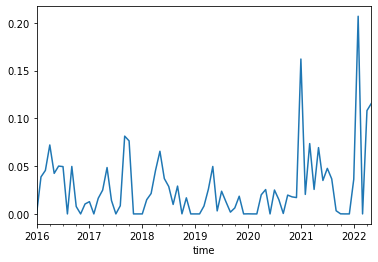

In [109]:
df['CAT'].plot()

In [105]:
df.to_csv('climate_score.csv')

In [106]:
df_tweets.groupby('ticker').count().id.sort_values()

ticker
HON      1688
BA       1725
CVX      2266
MCD      2671
UNH      2673
NKE      2741
WBA      2876
MMM      3000
HD       4144
WMT      4518
KO       4547
MA       4742
MRK      4872
INTC     4898
DOW      4967
AXP      6052
JNJ      6128
JPM      6390
TRV      6518
CAT      6593
PG       6847
AMGN     8038
IBM      8350
AAPL     9005
CSCO     9406
MSFT     9456
DIS     10151
T       11314
GS      14376
CRM     15252
Name: id, dtype: int64

In [107]:
df.shape

(77, 30)